In [1]:
from warnings import filterwarnings
filterwarnings ('ignore')

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

x and y separation

In [6]:
x=df.drop(columns=['TenYearCHD'])
y=df[['TenYearCHD']]

In [7]:
x.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [8]:
y.head()

,TenYearCHD
0,0
1,0
2,0
3,1
4,0


create preprocessing pipeline

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [10]:
num_pipe=Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),('scaler',StandardScaler())])

In [11]:
x_pre=num_pipe.fit_transform(x)

In [12]:
x_pre

array([[ 1.1531919 , -1.23495068,  2.00708772, ...,  0.28694273,
         0.34274444, -0.21751656],
       [-0.86715836, -0.41825733,  0.02090466, ...,  0.71932499,
         1.59027451, -0.26131108],
       [ 1.1531919 , -0.18491638, -0.97218687, ..., -0.11350221,
        -0.07309892, -0.52407818],
       ...,
       [-0.86715836, -0.18491638,  0.02090466, ..., -0.93404582,
         0.67541912,  0.17663409],
       [-0.86715836, -0.65159829, -0.97218687, ..., -1.63175357,
         0.84175647,  0.        ],
       [-0.86715836,  0.28176554,  0.02090466, ..., -1.06425185,
         0.34274444,  1.09631895]])

In [13]:
cols=num_pipe.get_feature_names_out()

In [14]:
cols

array(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'], dtype=object)

In [15]:
x_pre=pd.DataFrame(x_pre,columns=cols)
x_pre.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.153192,-1.234951,2.007088,-0.988271,-0.757974,-0.175844,-0.077033,-0.671101,-0.162477,-0.941346,-1.195907,-1.082625,0.286943,0.342744,-0.217517
1,-0.867158,-0.418257,0.020905,-0.988271,-0.757974,-0.175844,-0.077033,-0.671101,-0.162477,0.299595,-0.515187,-0.158988,0.719325,1.590275,-0.261311
2,1.153192,-0.184916,-0.972187,1.011868,0.925835,-0.175844,-0.077033,-0.671101,-0.162477,0.186782,-0.220209,-0.242955,-0.113502,-0.073099,-0.524078
3,-0.867158,1.331800,1.013996,1.011868,1.767740,-0.175844,-0.077033,1.490089,-0.162477,-0.264469,0.800871,1.016549,0.682474,-0.904786,0.921141
4,-0.867158,-0.418257,1.013996,1.011868,1.178407,-0.175844,-0.077033,-0.671101,-0.162477,1.089284,-0.106755,0.092912,-0.663807,0.758588,0.132840


Train test split

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_pre,y,test_size=0.3,random_state=42)

In [17]:
xtrain.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2010,-0.867158,-0.884939,-0.972187,1.011868,-0.000260,-0.175844,-0.077033,1.490089,-0.162477,0.841096,0.120151,0.596714,-0.887368,-0.488942,0.000000
3340,-0.867158,1.681811,-0.972187,-0.988271,-0.757974,5.758885,-0.077033,1.490089,-0.162477,1.089284,1.254684,0.344813,1.023958,-0.904786,0.220429
3591,-0.867158,-1.234951,0.020905,-0.988271,-0.757974,-0.175844,-0.077033,-0.671101,-0.162477,-0.715720,-1.286670,-0.746757,-1.290270,-0.655280,0.000000
2742,1.153192,-1.118280,-0.972187,1.011868,0.925835,-0.175844,-0.077033,-0.671101,-0.162477,-0.196781,-0.061374,-0.242955,0.237808,-0.987954,-0.348900
4034,-0.867158,-1.118280,0.020905,1.011868,0.925835,-0.175844,-0.077033,-0.671101,-0.162477,-0.535220,-0.106755,-0.242955,-1.430303,1.673443,-0.261311


In [18]:
ytrain.head()

,TenYearCHD
2010,0
3340,0
3591,0
2742,0
4034,0


In [19]:
xtrain.shape

(2966, 15)

In [20]:
xtest.shape

(1272, 15)

create a logistic regression

In [21]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [22]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [23]:
model.score(xtrain,ytrain)

0.8530006743088334

In [24]:
model.score(xtest,ytest)

0.8608490566037735

predict the train and test result

In [25]:
ypred_tr=model.predict(xtrain)

In [26]:
ypred_ts=model.predict(xtest)

In [27]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [28]:
ytrain.head()

,TenYearCHD
2010,0
3340,0
3591,0
2742,0
4034,0


In [29]:
ypred_ts[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [30]:
ytest.head()

,TenYearCHD
3188,0
764,0
3264,0
1967,0
2185,0


In [35]:
ypred_tr[0:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

probability of the class

In [38]:
yprob_tr=model.predict_proba(xtrain)
yprob_ts=model.predict_proba(xtest)

In [39]:
model.classes_

array([0, 1], dtype=int64)

In [40]:
yprob_tr[0:5]

array([[0.91847739, 0.08152261],
       [0.63047037, 0.36952963],
       [0.96871081, 0.03128919],
       [0.90688306, 0.09311694],
       [0.94063656, 0.05936344]])

In [41]:
yprob_ts[0:5]

array([[0.66341006, 0.33658994],
       [0.9181996 , 0.0818004 ],
       [0.89886583, 0.10113417],
       [0.82646075, 0.17353925],
       [0.93556692, 0.06443308]])

plot confusion matrix for test 

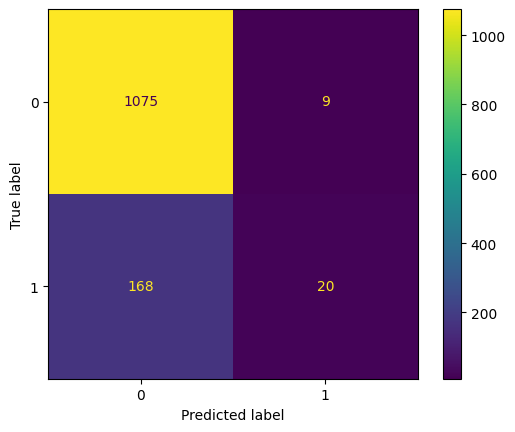

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf=confusion_matrix(ytest,ypred_ts)
cdf=ConfusionMatrixDisplay(cf,display_labels=model.classes_)
cdf.plot()

print clasification report 

In [44]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1084
           1       0.69      0.11      0.18       188

    accuracy                           0.86      1272
   macro avg       0.78      0.55      0.55      1272
weighted avg       0.84      0.86      0.81      1272



crossvalidation f1 score

In [45]:
from sklearn.model_selection import cross_val_score


In [46]:
acc_score=cross_val_score(model,xtrain,ytrain,cv=5,scoring='accuracy')

In [47]:
acc_score

array([0.85353535, 0.846543  , 0.84317032, 0.84822934, 0.85834739])

In [48]:
acc_score.mean()

0.8499650808251145

In [49]:
f1_score=cross_val_score(model,xtrain,ytrain,cv=5,scoring='f1_macro')
f1_score

array([0.52066116, 0.5162395 , 0.51412713, 0.51731061, 0.54948991])

In [50]:
f1_score.mean()

0.5235656618129121

In [51]:
precision=cross_val_score(model,xtrain,ytrain,scoring='precision_macro')
precision

array([0.8553176 , 0.67685026, 0.6408833 , 0.69970322, 0.83864417])

In [52]:
precision.mean()

0.742279708292294

In [53]:
recall_score=cross_val_score(model,xtrain,ytrain,scoring="recall_macro")
recall_score

array([0.53161268, 0.52699094, 0.52499891, 0.52798695, 0.54745852])

In [54]:
recall_score.mean()

0.5318095986812426